<a href="https://colab.research.google.com/github/shpotes/image-classification/blob/master/playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
%cd /content/
!rm -rf image-classification
!git clone https://github.com/shpotes/image-classification/
%cd image-classification
!pip install -q -r requirement.txt

/content
Cloning into 'image-classification'...
remote: Enumerating objects: 3781, done.
remote: Counting objects: 100% (3781/3781), done.
remote: Compressing objects: 100% (2359/2359), done.
remote: Total 3781 (delta 1442), reused 3751 (delta 1417), pack-reused 0
Receiving objects: 100% (3781/3781), 6.10 MiB | 40.33 MiB/s, done.
Resolving deltas: 100% (1442/1442), done.
/content/image-classification


In [23]:
import json

import pandas as pd
import tensorflow as tf
import numpy as np

from model.dataset import *
from model.model import *

%load_ext autoreload
%autoreload 2

with open('config.json') as raw_config:
    config = json.load(raw_config)
    
train_source = build_source_from_metadata(pd.read_csv(config['model']['metadata_path']),
                                        config['model']['data_path'], 'train')
train_source[:5]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[('data/train/b8fa6d5cd0dd498da017faf791b69317.jpg', 1),
 ('data/train/384b476842f74f52b7d39350134c35f7.jpg', 1),
 ('data/train/dca45807e6354e1ba5b15f00810c39e8.jpg', 2),
 ('data/train/9906c2507aa04d6d8ff648f79e066fa7.jpg', 2),
 ('data/train/20e62dfb86bc43a7a14f3bc83f1d0841.jpg', 2)]

In [24]:
config['train']['over_epochs'] = 50

model = AlexNet(config, overfit_mode=True)
print(model)

AlexNet

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CONV1 (Conv2D)               (None, 55, 55, 96)        34944     
_________________________________________________________________
MAX_POOL1 (MaxPooling2D)     (None, 27, 27, 96)        0         
_________________________________________________________________
NORM1 (BatchNormalization)   (None, 27, 27, 96)        384       
_________________________________________________________________
zero_padding2d_12 (ZeroPaddi (None, 31, 31, 96)        0         
_________________________________________________________________
CONV2 (Conv2D)               (None, 27, 27, 256)       614656    
_________________________________________________________________
MAX_POOL2 (MaxPooling2D)     (None, 13, 13, 256)       0         
_________________________________________________________________
NORM2 (BatchNormalization)   (None, 13, 13, 2

In [25]:
hist = model.train()

W0707 07:13:38.804761 140434443208576 training_utils.py:1436] Expected a shuffled dataset but input dataset `x` is not shuffled. Please invoke `shuffle()` on input dataset.


Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 1.9023 - accuracy: 0.0000e+00 - val_loss: 1.5944 - val_accuracy: 0.4189
Epoch 2/50
1/1 [==============================] - 1s 976ms/step - loss: 1.6385 - accuracy: 0.4000 - val_loss: 1.5520 - val_accuracy: 0.4408
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 1.7159 - accuracy: 0.4000 - val_loss: 1.6730 - val_accuracy: 0.0419
Epoch 4/50
1/1 [==============================] - 1s 974ms/step - loss: 0.9347 - accuracy: 0.6000 - val_loss: 1.6780 - val_accuracy: 0.0419
Epoch 5/50
1/1 [==============================] - 1s 974ms/step - loss: 3.1289 - accuracy: 0.4000 - val_loss: 1.5569 - val_accuracy: 0.2951
Epoch 6/50
1/1 [==============================] - 1s 980ms/step - loss: 3.4808 - accuracy: 0.4000 - val_loss: 1.4576 - val_accuracy: 0.4408
Epoch 7/50
1/1 [==============================] - 1s 969ms/step - loss: 1.1588 - accuracy: 0.8000 - val_loss: 1.4622 - val_accuracy: 0.4408
Epoch 8/50
1/1 [======

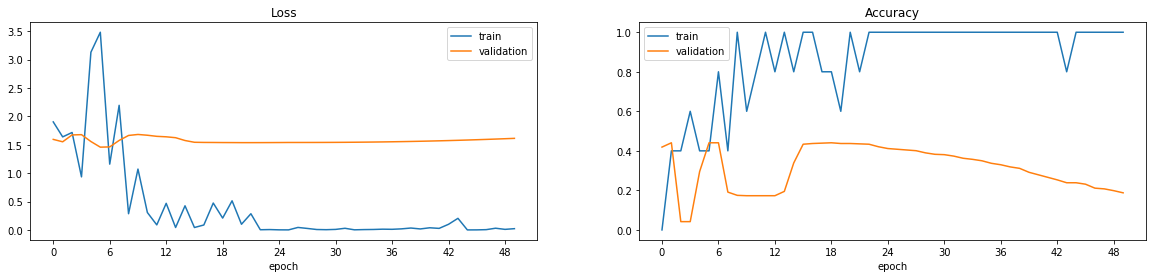

In [26]:
from matplotlib.ticker import MaxNLocator

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.set_figwidth(20)

ax1.plot(hist.history['loss'], label='train')
ax1.plot(hist.history['val_loss'], label='validation')
ax1.legend()
ax1.set_xlabel('epoch')
ax1.set_title('Loss')


ax2.plot(hist.history['accuracy'], label='train')
ax2.plot(hist.history['val_accuracy'], label='validation')
ax2.legend()
ax2.set_title('Accuracy')
ax2.set_xlabel('epoch')

plt.show()

In [29]:
model.evaluate()

train
1/1 [==============================] - 0s 17ms/step - loss: 1.6254 - accuracy: 0.2000
test
106/106 [==============================] - 1s 10ms/step - loss: 1.6023 - accuracy: 0.1890


# Whole data

In [30]:
tf.keras.backend.clear_session()
model = AlexNet(config, overfit_mode=False)
print(model)

AlexNet

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CONV1 (Conv2D)               (None, 55, 55, 96)        34944     
_________________________________________________________________
MAX_POOL1 (MaxPooling2D)     (None, 27, 27, 96)        0         
_________________________________________________________________
NORM1 (BatchNormalization)   (None, 27, 27, 96)        384       
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 31, 31, 96)        0         
_________________________________________________________________
CONV2 (Conv2D)               (None, 27, 27, 256)       614656    
_________________________________________________________________
MAX_POOL2 (MaxPooling2D)     (None, 13, 13, 256)       0         
_________________________________________________________________
NORM2 (BatchNormalization)   (None, 13, 13, 256

In [31]:
hist = model.train()

W0707 07:20:23.845656 140434443208576 training_utils.py:1436] Expected a shuffled dataset but input dataset `x` is not shuffled. Please invoke `shuffle()` on input dataset.


Epoch 1/100
161/161 [==============================] - 11s 66ms/step - loss: 1.2204 - accuracy: 0.5751 - val_loss: 1.3639 - val_accuracy: 0.5301
Epoch 2/100
161/161 [==============================] - 7s 45ms/step - loss: 0.8956 - accuracy: 0.6837 - val_loss: 1.1708 - val_accuracy: 0.5920
Epoch 3/100
161/161 [==============================] - 7s 44ms/step - loss: 0.8171 - accuracy: 0.7144 - val_loss: 0.9300 - val_accuracy: 0.6321
Epoch 4/100
161/161 [==============================] - 7s 45ms/step - loss: 0.6891 - accuracy: 0.7588 - val_loss: 1.0514 - val_accuracy: 0.6776
Epoch 5/100
161/161 [==============================] - 7s 45ms/step - loss: 0.6474 - accuracy: 0.7611 - val_loss: 0.7282 - val_accuracy: 0.7559
Epoch 6/100
161/161 [==============================] - 7s 45ms/step - loss: 0.5876 - accuracy: 0.7938 - val_loss: 0.8247 - val_accuracy: 0.7541
Epoch 7/100
161/161 [==============================] - 7s 45ms/step - loss: 0.5320 - accuracy: 0.8043 - val_loss: 1.0314 - val_accuracy

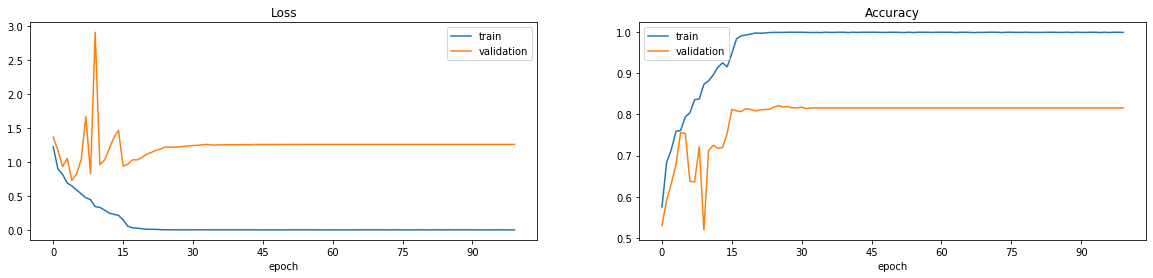

In [32]:
from matplotlib.ticker import MaxNLocator

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.set_figwidth(20)

ax1.plot(hist.history['loss'], label='train')
ax1.plot(hist.history['val_loss'], label='validation')
ax1.legend()
ax1.set_xlabel('epoch')
ax1.set_title('Loss')


ax2.plot(hist.history['accuracy'], label='train')
ax2.plot(hist.history['val_accuracy'], label='validation')
ax2.legend()
ax2.set_title('Accuracy')
ax2.set_xlabel('epoch')

plt.show()

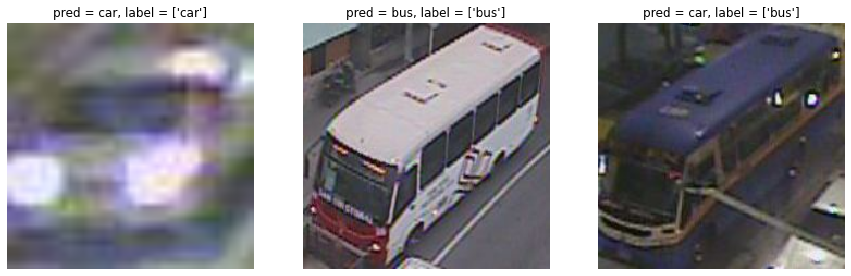

In [33]:
imshow_with_predictions(model, next(iter(model.test_data)), show_label=True, label_map=config['model']['labels'])

In [34]:
model.evaluate()

train
161/161 [==============================] - 4s 23ms/step - loss: 0.0082 - accuracy: 0.9969
test
34/34 [==============================] - 1s 27ms/step - loss: 1.1180 - accuracy: 0.8091


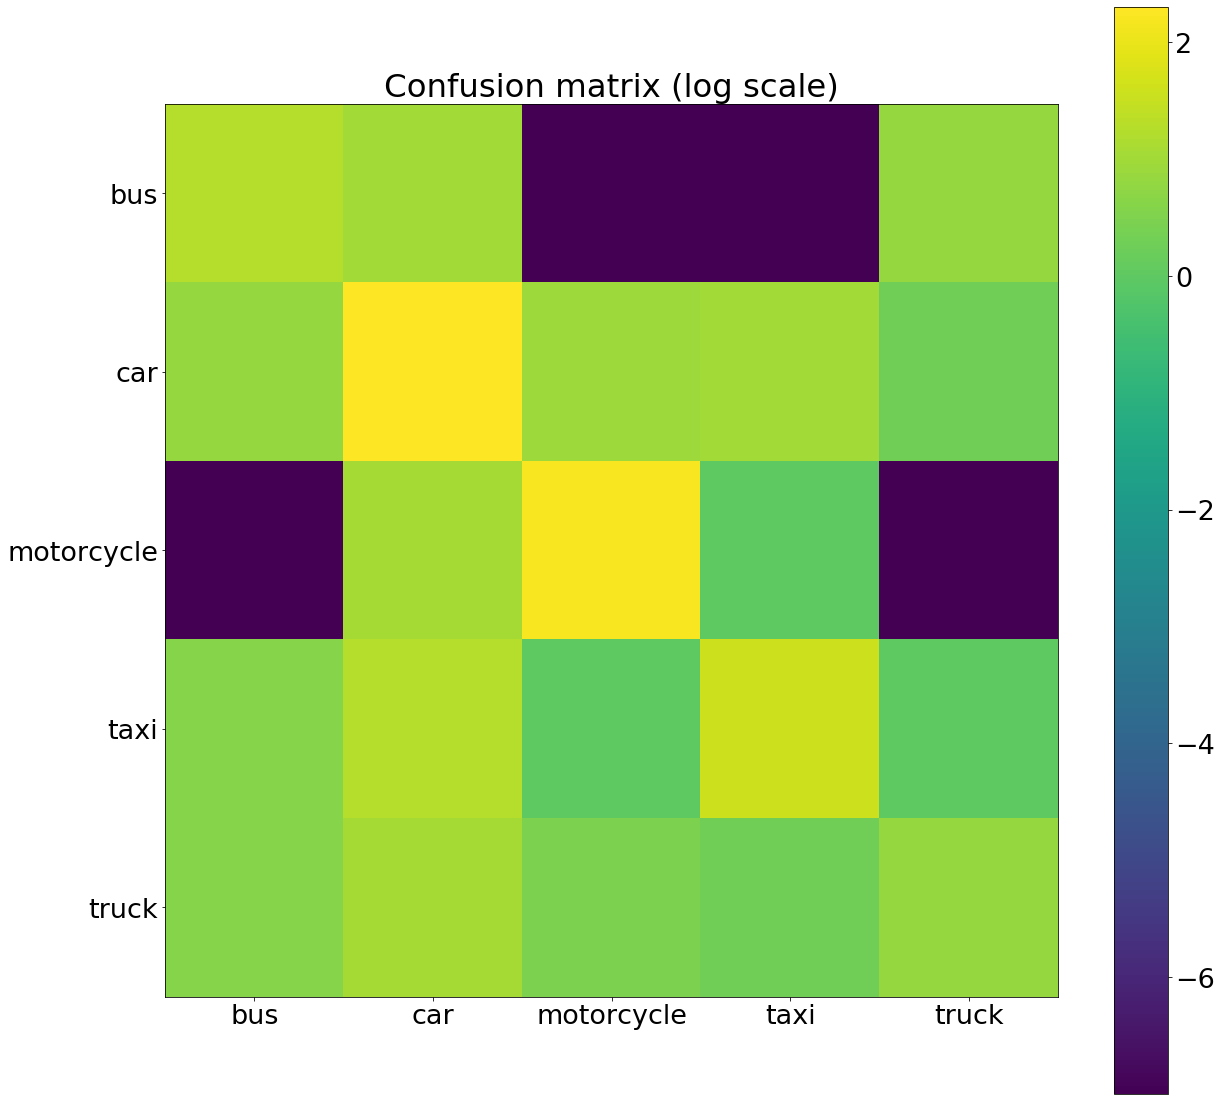

In [35]:
plt.rcParams.update({'font.size': 27})
plt.figure(figsize=(20, 20))
plt.imshow(np.log10(compute_confusion_matrix(model).numpy() + 0.0000001))
plt.yticks(np.arange(5), labels=config['model']['labels'])
plt.xticks(np.arange(5), labels=config['model']['labels'])
plt.title('Confusion matrix (log scale)')
plt.colorbar()